# GA Based DG to Facility Assignment Optimization Tests

In [1]:
from _products.visualization_tools import *
from _products.utility_fnc import blocking_sound_player as bsp, error_sounds as err_snd, Alert_sounds as alrt_snd
from _LearningMachines._BIO._GA.GA_TOOLS4 import *


# these need to be the paths to the data files for the various agents in the model
DG_FILES = r'DataFiles/dg.csv'
budget = r'DataFiles/budget.csv'
Distances = r'DataFiles/Distance of DG to Building .csv'
facilities = r'DataFiles/nodes.csv'

# store the scores for a given generational biase
hp_dict = {}

In [2]:
dum_l = [np.zeros(5)]

print(dum_l)
test_dmd = np.array([1, 3, 44, 5, 100])
dum_l[0][3] = 1

print(dum_l)

print(sum(dum_l[0]*test_dmd))

[array([0., 0., 0., 0., 0.])]
[array([0., 0., 0., 1., 0.])]
5.0


# total investment cost for a given solution: Must not exceed budget

![Investment cost Equation](_Media_/_INFORMATION/_IMG/eqn1.png)

In [3]:
 base_budgets = pd.DataFrame({
        'id': [1, 2, 3, 4],
        "budget": [1000000,5000000,10000000,15000000],
    })

sample_dg = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    "cost":[5, 5, 1, 10, 2],
    "output":[230, 1222, 123, 300, 600],
    "opmain":[3, 10, 1, 5, 9], 
    "capacity": [300, 1222, 200, 400, 900]})

sample_node = pd.DataFrame({
    "demand":[5, 5, 1, 10, 2],
    "penalty":[230, 1222, 123, 300, 600],
    })

distances = [
    [2000, 100, 230, 3009, 1234],
    [123, 90, 234, 1233, 890],
    [122, 600, 789, 9009, 100],
    [1232, 45, 6790, 234, 7878],
    [1233, 456, 6768, 9088, 1230]]



chromo = np.array([0, 1, 1, 0, 1])

n_desired = 4
n_chrom = np.count_nonzero(chromo)

n_count_error = abs(n_desired - n_chrom)
print(n_chrom)
print(n_count_error)

inv_cost = sample_dg['cost'].values * sample_dg['output'].values
print("investment cost")
display(inv_cost)

print("dot")
print(np.dot(inv_cost, chromo.T))

3
1
investment cost


array([1150, 6110,  123, 3000, 1200], dtype=int64)

dot
7433


# Operation and Maintenance cost

![Operation and Maintenance cost](_Media_/_INFORMATION/_IMG/eqn2_ops_maint.png)
<br>
![Operation and Maintenance variables](_Media_/_INFORMATION/_IMG/opmaint_vars.png)

In [4]:
# base operation need to only get product for a node corresponding to assignement
# First do assignment loging which nodes go to which open DG
# the use logged assignments to calculte total demand for that node
#       1) keep assignments as a boolean list list as well
#             :-> dg_j == [0, 0, 0, 1,.......]
#                             0 = not assignmed
#                             1 = assigned

assignments = [False, False, True, False, True]
chh =[x==1 for x in chromo] 

print("chh")
print(chh)
a = sample_dg.loc[chh, 'opmain'].values

c = sample_node.loc[assignments, :]

b = sample_node.loc[assignments, :]['demand'].values
# select all DGs that are open using chromosome


print(a)
print(b)

# opmain_current_assign = a * b
# print(opmain_current_assign)
# total_opmain_out = np.dot(opmain_current_assign, chromo.T)
# print("Total operationcost")
# print(total_opmain_out)

chh
[False, True, True, False, True]
[10  1  9]
[1 2]


# Distance of distribution cost


![Distance cost](_Media_/_INFORMATION/_IMG/eqn_3distance.png)

# minimizes the total network power outage (unmet demand) during a large-scale grid disturbance:
![unmet demand](_Media_/_INFORMATION/_IMG/eqn4_unmetdamand.png)


# Excess Power 


![Excess power penalty](_Media_/_INFORMATION/_IMG/ExcessPF.png)
![unmet demand](_Media_/_INFORMATION/_IMG/EXCESSPF_para.png)

# Below is just to have a look at some of the data from the dg file

#  mitigate the potential RPF issue by minimizing the amount of excess renewable penetration (RPF amounts) experienced within the network

In [5]:
DG_df = pd.read_csv(DG_FILES)

display(DG_df.head())

for v in DG_df.columns.tolist():
    print("'{}',".format(v))

,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.68,1.36,2.04
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.68,1.36,2.04
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.68,1.36,2.04
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.68,1.36,2.04
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.68,1.36,2.04


'id',
'output',
'pos-x',
'pos-y',
'rated_power',
'investment_cost',
'o&m_cost',
'excess_penetration_cost_LOW',
'excess_penetration_cost_MEDIUM',
'excess_penetration_cost_HIGH',


In [6]:
DGdist_df = pd.read_csv(Distances)

display(DGdist_df.loc[].head())

for v in DGdist_df.columns.tolist():
    print("'{}',".format(v))

,demand_node,dg-1,dg-2,dg-3,dg-4,dg-5,dg-6,dg-7,dg-8,dg-9,...,dg-16,dg-17,dg-18,dg-19,dg-20,dg-21,dg-22,dg-23,dg-24,dg-25
0,demand-1,0.000,1.011,8.072,1.536,2.949,3.130,2.364,2.741,4.157,...,6.612,6.326,0.828,3.428,4.897,4.266,2.256,1.572,1.643,1.158
1,demand-2,1.011,0.000,7.346,0.532,3.114,2.270,1.358,1.939,3.945,...,7.154,6.001,0.184,3.943,4.470,3.298,1.664,1.005,1.252,0.813
2,demand-3,8.072,7.346,0.000,6.917,6.493,7.482,6.363,5.407,4.900,...,9.242,3.585,7.462,7.741,3.733,6.704,8.167,7.956,8.269,8.052
3,demand-4,1.536,0.532,6.917,0.000,3.223,1.967,0.829,1.528,3.826,...,7.389,5.787,0.710,4.200,4.220,2.853,1.648,1.131,1.437,1.137
4,demand-5,2.949,3.114,6.493,3.223,0.000,5.163,3.643,2.820,1.663,...,4.280,3.789,3.046,1.398,2.782,5.757,4.776,4.115,4.330,3.836


'demand_node',
'dg-1',
'dg-2',
'dg-3',
'dg-4',
'dg-5',
'dg-6',
'dg-7',
'dg-8',
'dg-9',
'dg-10',
'dg-11',
'dg-12',
'dg-13',
'dg-14',
'dg-15',
'dg-16',
'dg-17',
'dg-18',
'dg-19',
'dg-20',
'dg-21',
'dg-22',
'dg-23',
'dg-24',
'dg-25',


# Below is just to have a look at some of the data from the facility file

In [24]:
facility_df = pd.read_csv(facilities)
display(facility_df)
Penalty_options = sorted(pd.read_csv(facilities)['penalty'].unique())
print(Penalty_options)



,id,demand,penalty,pos-x,pos-y
0,1,495434,10,35.953747,-83.943975
1,2,495434,10,35.967477,-83.937751
2,3,495434,10,36.062503,-83.996649
3,4,495434,10,35.975097,-83.936355
4,5,495434,10,35.968580,-83.993414
5,6,18031,5,35.984883,-83.903327
6,7,18031,5,35.986606,-83.932197
7,8,18031,5,35.992759,-83.952804
8,9,18031,5,35.991716,-84.001613
9,10,18031,5,35.935312,-83.869820


[3, 5, 7, 10]


# Budget

* add budget storage
* incorporate the budget into cost solver for dg
* use to set threshold for DG costs
    - Total

In [8]:
display(pd.read_csv(budget))

,id,budget
0,1,0
1,2,1000000
2,3,5000000
3,4,10000000
4,5,15000000


In [9]:




# slight mutation bias, small offspring over best-copy bias
# score: 
# pm = .05                 # probability of muation, i.e. have bits flip in the children
# pc=.5                   # probability of the kids being mixtures of the parents(crossover) or being copies

# 
pm = .01                # probability of muation, i.e. have bits flip in the children
pc=.65                   # probability of the kids being mixtures of the parents(crossover) or being copies


pm = .05                 # probability of muation, i.e. have bits flip in the children
pc=.55                   # probability of the kids being mixtures of the parents(crossover) or being copies

population_size=20                # population size, i.e. the number of solution each generation

generations= 100       # the number of generations of solutions to run, i.e. the number of training epochs10+-*
strlen = None

num_open=2              # number of generators you wish to shoot for being open, oneprob is given this is ignored

oneprob=num_open/25
oneprob=None

init_func2 = None       # none uses one of the predesigne intializes based on wheither oneprob is None or not
#init_func2 = pure_rng_init          #bad
gaoptmzr = DG_Optimizer(population_size, 
                         pm, pc,
                         DG_FILES, facilities, Distances, generations,strlen=strlen, budget=1,
                         budgetfile=budget, verbose=False, init_func=init_func2, count_penalty=1000,
                         penalize_count=False, unmet_demand=1,
                         threshold=.00001, Nopen=num_open, oneprob=oneprob, mode="MIN2")

# alert that setting up the optimizer is complete
bsp(alrt_snd[0])


> budget =  1
Budget: 1000000
unmet_demand_Penalty: 5
strlen:  25

				siniting.......




------------------The First Epoch's Generation---------------------

 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 


 2
23 

-------The First Epoch's Generation-Max: 2, Min: 2--------------



# The Spark.....

In [10]:
probability_gen=gaoptmzr.gaoptmzr.get_prob_tally
probability_gen=None
pair_selector = gaoptmzr.gaoptmzr.pair_pop
pair_selector = None


gaoptmzr.optimize(probability_gen=probability_gen, pair_selector=pair_selector,child_gen=None,)


hpKey = "pm: {}-pc: {}-oneprob: {}-Nopen: {}-pop: {}".format(pm, pc, oneprob,num_open, population_size)
if hpKey not in hp_dict:
    hp_dict[hpKey] = dict()
    hp_dict[hpKey]['best_score']=[]
    hp_dict[hpKey]['soln']=[] 

# store the results for this set up
hp_dict[hpKey]['best_score'].append(gaoptmzr.best_scores)
hp_dict[hpKey]['soln'].append(gaoptmzr.best_solution)




# allert that the tesing is complete
bsp(alrt_snd[1])
print("Done")

The game of life begins....

			-----------NEW BEST SCORE!!: 15385864.376000, GEN: 0
minimum investment:  3563612.96


Generation: 0
best_score this run: 15385864.376
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode:  MIN2

Generation: 2
best_score this run: 15385864.376
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode:  MIN2

Generation: 4
best_score this run: 91731643.501
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode: 


Generation: 54
best_score this run: 75411324.495
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode:  MIN2

Generation: 56
best_score this run: 80202203.109
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode:  MIN2

Generation: 58
best_score this run: 65308203.41599999
best score so far: 15385864.376
best Cost so far: 10258638.456
best solution so far: [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]
minimum ivestment:  3563612.96
pc: 0.55, pm: 0.05, pop: 20

Mode:  MIN2
Mode:  MIN2

Generation: 60
best_score this run: 63576969.618
best score so far: 15385864.376
best Cost so far: 1025

# Lets See how they did......

In [11]:
print('Best Score: ', gaoptmzr.best_score)

print('Best Solution: ', gaoptmzr.best_solution)

Best Score:  15385864.376
Best Solution:  [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]


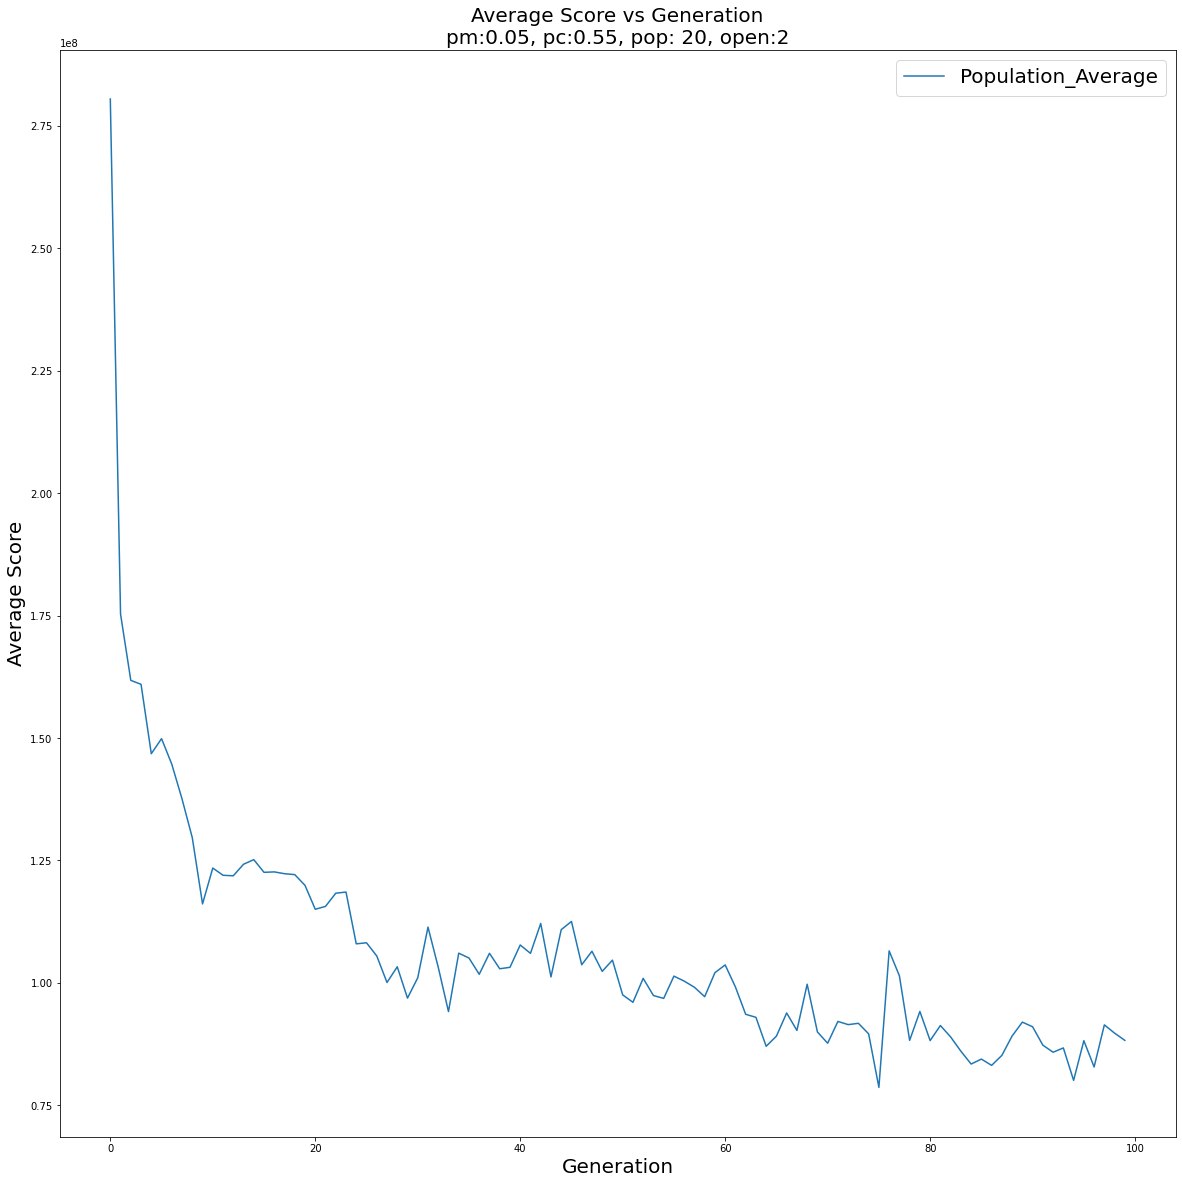

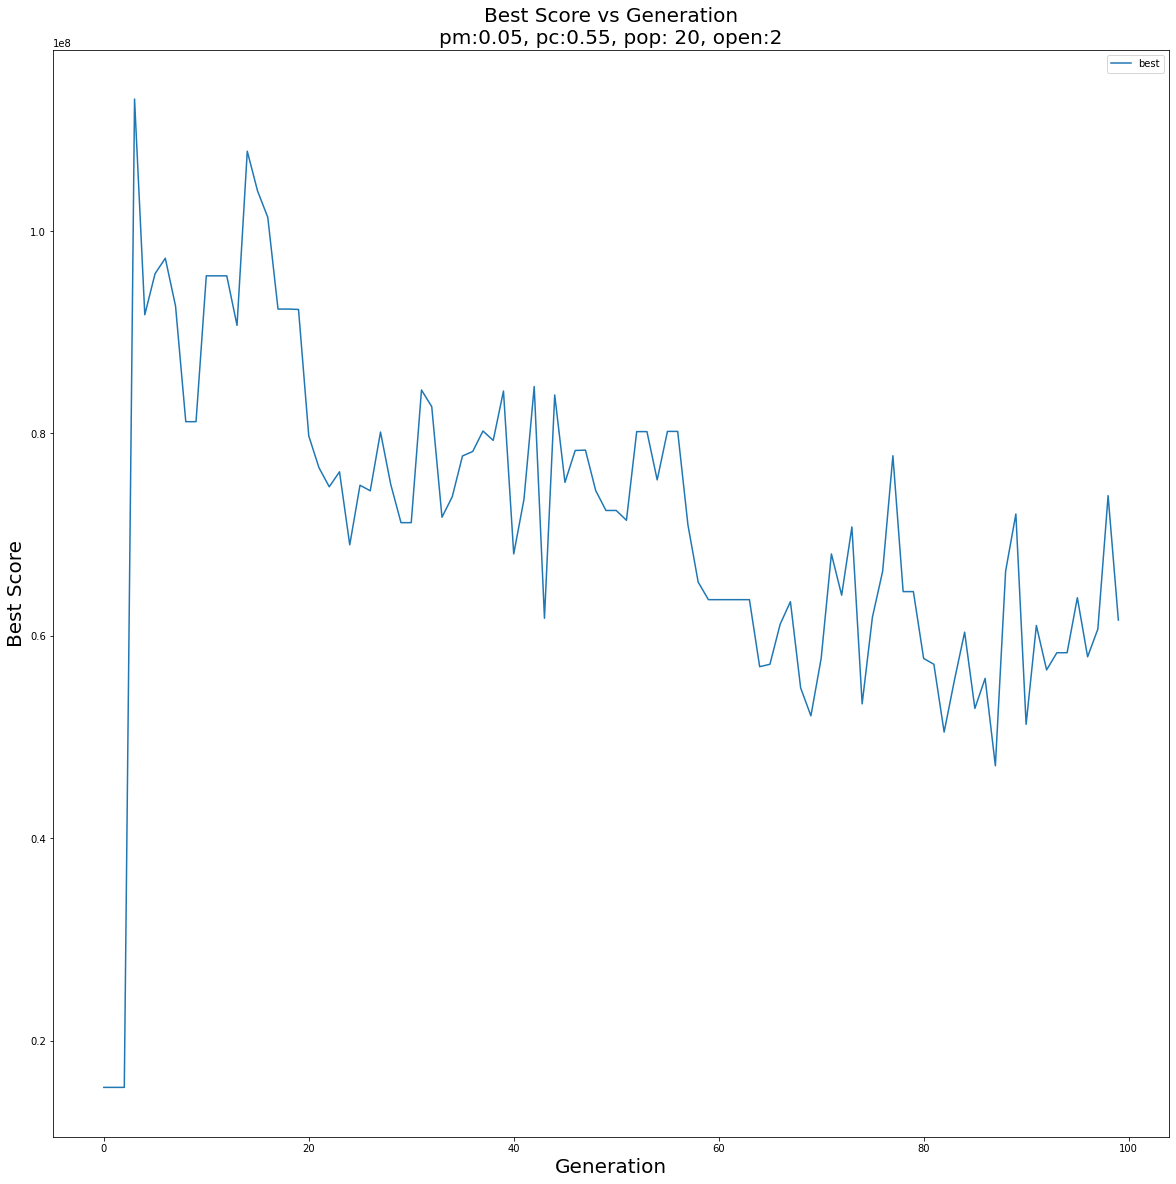


Set up:
pm: 0.05-pc: 0.55-oneprob: None-Nopen: 2-pop: 20
Average Best score: 71193857.44206 from 1 runs
Best Solution :[0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1.]


In [12]:
# visualize their solution learning ability
gaoptmzr.show_results(figsize=(20, 20),
                     fontdict={"size":20}, prop={"size":20},
                    )



# Display results log:
for Key in hp_dict:
    print("\nSet up:\n{}".format(Key))
    print("Average Best score: {} from {} runs".format(np.mean(hp_dict[Key]['best_score']), len(hp_dict[Key]['best_score'])))
    print("Best Solution :{}".format(hp_dict[Key]['soln'][0])) 


In [13]:
# Testing setting 1 by index
ze = np.zeros(10)
ze[np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False)] = 1
ze

array([0., 1., 1., 0., 1., 1., 1., 0., 1., 0.])

# Solution Testing Cell
> copy the reportes best solution into the list of list solns and run the cell to make sure the 
> reported scores match up to the calculated ones. This basically is a sanity check

In [22]:
# Test a given solution to make sure things are working as expected
solns = [gaoptmzr.best_solution]

# reported 33305047.277000, 
# 17294281.508
#  1772081 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

scores = gaoptmzr.gaoptmzr.solver.score_population(solns, penalize_budget=True)
idx=0
indices = []
for i in solns[0]: 
    if i == 1:
        print("Solution Id {}".format(idx))
        indices.append(idx)
    idx += 1
print(gaoptmzr.gaoptmzr.solver.dgset.assignments)

facc = list()
for k in gaoptmzr.gaoptmzr.solver.dgset.assignments:
    facc += gaoptmzr.gaoptmzr.solver.dgset.assignments[k]
    
print("Assigned Facilities: {}".format(sorted(list(set(facc)))))
print("Calculated: ",scores)
print('Best Solution: ', list(gaoptmzr.best_solution))
print("Investment: ", gaoptmzr.gaoptmzr.solver.investment_d)
print("True Cost: ", gaoptmzr.gaoptmzr.solver.truecost)
print("Percentage of Demand Met: {:.2f}".format(gaoptmzr.gaoptmzr.solver.nodes.nodes['suppliedPower'].sum()/gaoptmzr.gaoptmzr.solver.nodes.nodes['demand'].sum()))

Solution Id 1
Solution Id 5
Solution Id 6
Solution Id 10
Solution Id 13
Solution Id 17
Solution Id 21
Solution Id 24
{0: [], 1: [1, 3], 2: [], 3: [], 4: [], 5: [5, 20], 6: [6], 7: [], 8: [], 9: [], 10: [2, 4, 7, 8, 10, 11, 14, 16, 19], 11: [], 12: [], 13: [0, 13, 15, 18], 14: [], 15: [], 16: [], 17: [17], 18: [], 19: [], 20: [], 21: [9, 21], 22: [], 23: [], 24: [12, 22, 23, 24]}
Assigned Facilities: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Calculated:  {0: 143528407.408}
Best Solution:  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
Investment:  {0: 45608793.79}
True Cost:  {0: 54310819.827999994}
Percentage of Demand Met: 1.00


In [ ]:
# Best Solution:  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
# Investment:  {0: 45608793.79}
# True Cost:  {0: 54310819.827999994}
# Percentage of Demand Met: 1.00

In [44]:
facility_df = pd.read_csv(facilities)
DGdist_df = pd.read_csv(Distances)
DG_df = pd.read_csv(DG_FILES)
gaoptmzr.gaoptmzr.solver.dgset.dg_df.loc[indices, :].head()
on_indices = [1, 5, 6, 10, 14, 17, 21, 24]
assignments = {
               1: [1, 3],
               5: [5, 20],
               6: [6],              
               10: [2, 4, 7, 8, 10, 11, 14, 16, 19],       
               13: [0, 13, 15, 18],        
               17: [17], 
               21: [9, 21], 
               22: [], 23: [], 
               24: [12, 22, 23, 24]}
#DG_df
#facility_df
#Penalty_options
DG_df['current_output'] = DG_df['output'].values.tolist()
#DG_df['current_output'] = np.zeros(len(DG_df))
# calculate current_output based on the assignments
sum_inv_x_pwr= 0
# for fid in facility_df.index.tolist():
#     gotit = False
for dgId in assignments:
    print(dgId)
    opt =DG_df.loc[dgId, 'current_output']
    rpwr =DG_df.loc[dgId, 'rated_power']

    invc = DG_df.loc[dgId, 'investment_cost'] * opt
    pwer_left = rpwr - opt
    print(pwer_left)
    print(DG_df.loc[dgId, 'rated_power'] - DG_df.loc[dgId, 'current_output'])
    print(rpwr)
    print()
    for fid in assignments[dgId]:
        if pwer_left > facility_df.loc[fid,'demand']:
            # add this nodes demand to what the dg needs to(is) output(ing)
            DG_df.loc[dgId, 'current_output'] += facility_df.loc[fid, 'demand']
            # set this nodes to be fully supplied
            facility_df.loc[fid, 'suppliedPower'] = facility_df.loc[fid, 'demand']
        else:
            # set this dg to be outputting its max
            DG_df.loc[dgId, 'current_output'] = DG_df.loc[dgId, 'rated_power']
            # This node gets what ever the dg had left to give
            facility_df.loc[fid, 'suppliedPower'] = pwer_left
        # keep track of the total investment cost of DG allocation so we do not exceed budget
        opt =DG_df.loc[dgId, 'current_output']
#         ls


        invc = DG_df.loc[dgId, 'investment_cost'] * opt
        sum_inv_x_pwr +=invc
        # once we have found a suitable DG break the loop and assign for the next facility
        #break
sum_inv_x_pwr= 0
for dgId in assignments:
    opt =DG_df.loc[dgId, 'current_output']
    rpwr =DG_df.loc[dgId, 'rated_power']

    invc = DG_df.loc[dgId, 'investment_cost'] * opt
    sum_inv_x_pwr += invc 
        
        
print(sum_inv_x_pwr)

1
3648752.0
3648752.0
5000000.0

5
729750.0
729750.0
1000000.0

6
729750.0
729750.0
1000000.0

10
3648752.0
3648752.0
5000000.0

13
3648752.0
3648752.0
5000000.0

17
364875.0
364875.0
500000.0

21
729750.0
729750.0
1000000.0

22
729750.0
729750.0
1000000.0

23
729750.0
729750.0
1000000.0

24
729750.0
729750.0
1000000.0

12370981.900000002


In [ ]:
display(gaoptmzr.gaoptmzr.solver.nodes.nodes)
display(gaoptmzr.gaoptmzr.solver.dgset.dg_df)

# References:

* [Genetic Algorithms: John H. Holland, July 1992, Scientific American](https://www.jstor.org/stable/pdf/24939139.pdf?refreqid=excelsior%3A037d6e486556a59706db6b7fb51c5205)

* [Paper_Microgrid_Sim](https://github.com/ILABUTK/Paper_Microgrid_Sim)
* [Simulation-based_optimization](https://en.wikipedia.org/wiki/Simulation-based_optimization)
* [In Situ Operating Room–Based Simulation: A Review](https://www.sciencedirect.com/science/article/pii/S1931720417300028)